In [ ]:
# dataframe imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
import re

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

#tensorflow imports for keras
import tensorflow
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
data = pd.read_csv("/kaggle/input/data-work/data_work")
data['reviewText']=data['reviewText'].str.lower()
import string
string.punctuation 
def remove_punctuation(text):
    '''this function splits the words to letters, remove punctuation and 
        again getting together letters as words '''
    text_no_punc = "".join([c for c in text if c not in string.punctuation])
    return text_no_punc
data['review_clean'] = data['reviewText'].apply(lambda x: remove_punctuation(x))
data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,so sorry i didn't purchase this years ago when...,Amazing!,1352419200,so sorry i didnt purchase this years ago when ...
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,believe me when i tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,believe me when i tell you that you will recei...
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"i have seen x live many times, both in the ear...",A great document of a great band,1114041600,i have seen x live many times both in the earl...
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"i was so excited for this! finally, a live co...",YES!! X LIVE!!,1112745600,i was so excited for this finally a live conc...
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,x is one of the best punk bands ever. i don't ...,X have still got it,1291334400,x is one of the best punk bands ever i dont ev...


In [ ]:
def calc_sentiment_with_neutral(overall):
    '''encoding the sentiments of the ratings.'''
    if overall == 5 or overall == 4:
        return 2
    elif overall == 1 or overall==2 : 
        return 0
    else:
        return 1
data['sentiment'] = data['overall'].apply(calc_sentiment_with_neutral)
data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean,sentiment
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,so sorry i didn't purchase this years ago when...,Amazing!,1352419200,so sorry i didnt purchase this years ago when ...,2
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,believe me when i tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,believe me when i tell you that you will recei...,2
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"i have seen x live many times, both in the ear...",A great document of a great band,1114041600,i have seen x live many times both in the earl...,2
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"i was so excited for this! finally, a live co...",YES!! X LIVE!!,1112745600,i was so excited for this finally a live conc...,2
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,x is one of the best punk bands ever. i don't ...,X have still got it,1291334400,x is one of the best punk bands ever i dont ev...,2
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,5.0,True,"08 31, 2017",A2RCR40SNWKRH7,B00065W99Y,{'Size Name:': ' 1 Gallon'},The Dirt Guy,i used this cleaner as part of the first step ...,Amazing Cleaner,1504137600,i used this cleaner as part of the first step ...,2
399996,3.0,True,"03 21, 2016",A2C8BZOZKGW57H,B000VK4Q4K,{'Style:': ' 85-Lumen'},Joel C.,the flashlight is fairly cheaply made and i ha...,Once installed it worked great.,1458518400,the flashlight is fairly cheaply made and i ha...,1
399997,5.0,True,"11 4, 2017",A3QX3TEN2FS31K,B000I97FHY,{'Color:': ' white'},LEROY A DUCK,does what its suppose to.,Works well,1509753600,does what its suppose to,2
399998,5.0,True,"05 31, 2015",A1QZU5ZZJC5QYI,B0035YRCR2,{'Style:': ' Paddle On/Off Switch'},Rick C.,great,Five Stars,1433030400,great,2


In [ ]:
def calc_two_sentiment(overall):
    '''This function encodes the rating 1 and 2 as 0, others as 1'''
    if overall >= 3:
        return 1
    else:
        return 0
data['sentiment'] = data['overall'].apply(calc_two_sentiment)

In [ ]:
df_torch = data.head(100000)
df_torch= df_torch.loc[:, ['review_clean', 'sentiment']]
train_data, test_data = train_test_split(df_torch, test_size=0.2,random_state = 42)

In [ ]:
test_data.sentiment.value_counts()


1    18395
0     1605
Name: sentiment, dtype: int64

In [ ]:
train_data.dropna(inplace=True) # last more cleaning to make sure for null values

In [ ]:
train_data, test_data = train_test_split(train_data, test_size=0.2,random_state = 42)

In [ ]:
train_target = train_data.sentiment
train_texts = train_data.review_clean

test_target = test_data.sentiment
test_texts = test_data.review_clean

In [ ]:
def converting_texts(texts):
    collected_texts = []
    for text in texts:
        collected_texts.append(text)
    return collected_texts
        
train_texts = converting_texts(train_texts)
test_texts = converting_texts(test_texts)

In [ ]:
max_feat= 12000 #seting max features to define max number of tokenizer words

tokenizer = Tokenizer(num_words=max_feat)
tokenizer.fit_on_texts(train_texts)
# updates internal vocabulary based on a list of texts
# in the case where texts contains lists, we assume each entry of the lists to be a token
# required before using texts_to_sequences or texts_to_matrix

train_texts = tokenizer.texts_to_sequences(train_texts)
test_texts = tokenizer.texts_to_sequences(test_texts)
# transforms each text in texts to a sequence of integers
# Only top num_words-1 most frequent words will be taken into account 
# Only words known by the tokenizer will be taken into account

In [ ]:
max_len = max(len(train_ex) for train_ex in train_texts) #setting the max length

# using pad_sequence tool from Keras
# transforms a list of sequences to into a 2D Numpy array of shape 
# the maxlen argument for the length of the longest sequence in the list
train_texts = pad_sequences(train_texts, maxlen=max_len)
test_texts = pad_sequences(test_texts, maxlen=max_len)

In [ ]:
def build_model():
    sequences = layers.Input(shape=(max_len,))
    embedded = layers.Embedding(max_feat, 64)(sequences)
    x = layers.Conv1D(64, 3, activation='relu')(embedded)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(3)(x)
    x = layers.Conv1D(64, 5, activation='relu')(x)
    x = layers.GlobalMaxPool1D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(100, activation='relu')(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=sequences, outputs=predictions)
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model
    
model = build_model()

In [ ]:
model.fit(
    train_texts, 
    train_target, 
    batch_size=128,
    epochs=10,
    validation_data=(test_texts, test_target) )

Epoch 1/10
500/500 [==============================] - 60s 117ms/step - loss: 0.2102 - binary_accuracy: 0.9273 - val_loss: 0.2272 - val_binary_accuracy: 0.9302
Epoch 2/10
500/500 [==============================] - 51s 102ms/step - loss: 0.1406 - binary_accuracy: 0.9462 - val_loss: 0.1699 - val_binary_accuracy: 0.9380
Epoch 3/10
500/500 [==============================] - 49s 98ms/step - loss: 0.0943 - binary_accuracy: 0.9652 - val_loss: 0.1829 - val_binary_accuracy: 0.9346
Epoch 4/10
500/500 [==============================] - 45s 91ms/step - loss: 0.0602 - binary_accuracy: 0.9793 - val_loss: 0.2355 - val_binary_accuracy: 0.9377
Epoch 5/10
500/500 [==============================] - 43s 86ms/step - loss: 0.0419 - binary_accuracy: 0.9858 - val_loss: 0.2576 - val_binary_accuracy: 0.9334
Epoch 6/10
500/500 [==============================] - 43s 86ms/step - loss: 0.0325 - binary_accuracy: 0.9894 - val_loss: 0.3079 - val_binary_accuracy: 0.9321
Epoch 7/10
500/500 [==============================

In [ ]:
def build_model():
    sequences = layers.Input(shape=(max_len,))
    embedded = layers.Embedding(max_feat, 64)(sequences)
    x = layers.Conv1D(64, 3, activation='relu')(embedded)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(3)(x)
    x = layers.Conv1D(64, 5, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(5)(x)
    x = layers.Conv1D(64, 5, activation='relu')(x)
    x = layers.GlobalMaxPool1D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(100, activation='relu')(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=sequences, outputs=predictions)
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model
    
model = build_model()

In [ ]:
model.fit(
    train_texts, 
    train_target, 
    batch_size=128,
    epochs=20,
    validation_data=(test_texts, test_target) )

Epoch 1/20
500/500 [==============================] - 88s 160ms/step - loss: 0.2552 - binary_accuracy: 0.9191 - val_loss: 0.2202 - val_binary_accuracy: 0.9224
Epoch 2/20
500/500 [==============================] - 66s 132ms/step - loss: 0.1546 - binary_accuracy: 0.9413 - val_loss: 0.2414 - val_binary_accuracy: 0.9283
Epoch 3/20
500/500 [==============================] - 59s 118ms/step - loss: 0.1196 - binary_accuracy: 0.9554 - val_loss: 0.3051 - val_binary_accuracy: 0.9320
Epoch 4/20
500/500 [==============================] - 54s 108ms/step - loss: 0.0835 - binary_accuracy: 0.9696 - val_loss: 0.3453 - val_binary_accuracy: 0.8594
Epoch 5/20
500/500 [==============================] - 51s 102ms/step - loss: 0.0542 - binary_accuracy: 0.9819 - val_loss: 0.2257 - val_binary_accuracy: 0.9269
Epoch 6/20
500/500 [==============================] - 48s 97ms/step - loss: 0.0403 - binary_accuracy: 0.9862 - val_loss: 0.3096 - val_binary_accuracy: 0.9364
Epoch 7/20
500/500 [===========================

In [ ]:
def build_lstm_model():
    sequences = layers.Input(shape=(max_len,))
    embedded = layers.Embedding(max_feat, 64)(sequences)
    x = layers.LSTM(128, return_sequences=True)(embedded)
    x = layers.LSTM(128)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(100, activation='relu')(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=sequences, outputs=predictions)
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model
    
rnn_model = build_lstm_model()

In [ ]:
rnn_model.fit(
    train_texts, 
    train_target, 
    batch_size=128,
    epochs=10,
    validation_data=(test_texts, test_target) )

Epoch 1/10
500/500 [==============================] - 487s 967ms/step - loss: 0.2444 - binary_accuracy: 0.9189 - val_loss: 0.2025 - val_binary_accuracy: 0.9235
Epoch 2/10
500/500 [==============================] - 492s 984ms/step - loss: 0.1784 - binary_accuracy: 0.9331 - val_loss: 0.1830 - val_binary_accuracy: 0.9348
Epoch 3/10
500/500 [==============================] - 482s 964ms/step - loss: 0.1583 - binary_accuracy: 0.9406 - val_loss: 0.1871 - val_binary_accuracy: 0.9349
Epoch 4/10
500/500 [==============================] - 482s 964ms/step - loss: 0.1469 - binary_accuracy: 0.9448 - val_loss: 0.1754 - val_binary_accuracy: 0.9366
Epoch 5/10
500/500 [==============================] - 492s 984ms/step - loss: 0.1408 - binary_accuracy: 0.9482 - val_loss: 0.1803 - val_binary_accuracy: 0.9348
Epoch 6/10
500/500 [==============================] - 482s 964ms/step - loss: 0.1313 - binary_accuracy: 0.9521 - val_loss: 0.1844 - val_binary_accuracy: 0.9233
Epoch 7/10
500/500 [====================

In [ ]:
def build_rnn_model():
    sequences = layers.Input(shape=(max_len,))
    embedded = layers.Embedding(max_feat, 64)(sequences)
    x = layers.GRU(128, return_sequences=True)(embedded)
    x = layers.GRU(128)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(100, activation='relu')(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=sequences, outputs=predictions)
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model
    
rnn_model = build_rnn_model()

In [ ]:

rnn_model.fit(
    train_texts, 
    train_target, 
    batch_size=128,
    epochs=20,
    validation_data=(test_texts, test_target) )

Epoch 1/20
500/500 [==============================] - 453s 898ms/step - loss: 0.2331 - binary_accuracy: 0.9220 - val_loss: 0.2112 - val_binary_accuracy: 0.9261
Epoch 2/20
500/500 [==============================] - 447s 894ms/step - loss: 0.1834 - binary_accuracy: 0.9324 - val_loss: 0.1983 - val_binary_accuracy: 0.9292
Epoch 3/20
500/500 [==============================] - 436s 871ms/step - loss: 0.1673 - binary_accuracy: 0.9372 - val_loss: 0.1921 - val_binary_accuracy: 0.9362
Epoch 4/20
500/500 [==============================] - 447s 895ms/step - loss: 0.1513 - binary_accuracy: 0.9428 - val_loss: 0.1834 - val_binary_accuracy: 0.9361
Epoch 5/20
500/500 [==============================] - 436s 872ms/step - loss: 0.1390 - binary_accuracy: 0.9483 - val_loss: 0.1740 - val_binary_accuracy: 0.9354
Epoch 6/20
500/500 [==============================] - 447s 895ms/step - loss: 0.1267 - binary_accuracy: 0.9532 - val_loss: 0.1702 - val_binary_accuracy: 0.9356
Epoch 7/20
500/500 [====================

In [ ]:
# to use pandas dataframe
import pandas as pd 
import numpy as np

# for modeling and evaluation
from transformers import BertTokenizer
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import random

import time
import datetime

# to plot
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import torch

In [ ]:
import tensorflow as tf

# find the exact GPU name and assign it to this notebook
device_name = tf.test.gpu_device_name()

# To check the device name is found like below
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

Found GPU at: /device:GPU:0


In [ ]:
data = pd.read_csv("/kaggle/input/data-work/data_work")
data['reviewText']=data['reviewText'].str.lower()
import string
string.punctuation 
def remove_punctuation(text):
    '''this function splits the words to letters, remove punctuation and 
        again getting together letters as words '''
    text_no_punc = "".join([c for c in text if c not in string.punctuation])
    return text_no_punc
data['review_clean'] = data['reviewText'].apply(lambda x: remove_punctuation(x))
data.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,so sorry i didn't purchase this years ago when...,Amazing!,1352419200,so sorry i didnt purchase this years ago when ...
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,believe me when i tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,believe me when i tell you that you will recei...
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"i have seen x live many times, both in the ear...",A great document of a great band,1114041600,i have seen x live many times both in the earl...
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"i was so excited for this! finally, a live co...",YES!! X LIVE!!,1112745600,i was so excited for this finally a live conc...
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,x is one of the best punk bands ever. i don't ...,X have still got it,1291334400,x is one of the best punk bands ever i dont ev...


In [ ]:
def calc_sentiment_with_neutral(overall):
    '''encoding the sentiments of the ratings.'''
    if overall == 5 or overall == 4:
        return 2
    elif overall == 1 or overall==2 : 
        return 0
    else:
        return 1
data['sentiment'] = data['overall'].apply(calc_sentiment_with_neutral)
data

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,review_clean,sentiment
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,so sorry i didn't purchase this years ago when...,Amazing!,1352419200,so sorry i didnt purchase this years ago when ...,2
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,believe me when i tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,believe me when i tell you that you will recei...,2
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"i have seen x live many times, both in the ear...",A great document of a great band,1114041600,i have seen x live many times both in the earl...,2
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"i was so excited for this! finally, a live co...",YES!! X LIVE!!,1112745600,i was so excited for this finally a live conc...,2
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,x is one of the best punk bands ever. i don't ...,X have still got it,1291334400,x is one of the best punk bands ever i dont ev...,2
...,...,...,...,...,...,...,...,...,...,...,...,...
399995,5.0,True,"08 31, 2017",A2RCR40SNWKRH7,B00065W99Y,{'Size Name:': ' 1 Gallon'},The Dirt Guy,i used this cleaner as part of the first step ...,Amazing Cleaner,1504137600,i used this cleaner as part of the first step ...,2
399996,3.0,True,"03 21, 2016",A2C8BZOZKGW57H,B000VK4Q4K,{'Style:': ' 85-Lumen'},Joel C.,the flashlight is fairly cheaply made and i ha...,Once installed it worked great.,1458518400,the flashlight is fairly cheaply made and i ha...,1
399997,5.0,True,"11 4, 2017",A3QX3TEN2FS31K,B000I97FHY,{'Color:': ' white'},LEROY A DUCK,does what its suppose to.,Works well,1509753600,does what its suppose to,2
399998,5.0,True,"05 31, 2015",A1QZU5ZZJC5QYI,B0035YRCR2,{'Style:': ' Paddle On/Off Switch'},Rick C.,great,Five Stars,1433030400,great,2


In [ ]:
def calc_two_sentiment(overall):
    '''This function encodes the rating 1 and 2 as 0, others as 1'''
    if overall >= 3:
        return 1
    else:
        return 0
data['sentiment'] = data['overall'].apply(calc_two_sentiment)

In [ ]:
df_torch = data.head(100000)
df_torch= df_torch.loc[:, ['review_clean', 'sentiment']]
train_data, test_data = train_test_split(df_torch, test_size=0.2,random_state = 42)

In [ ]:
test_data.sentiment.value_counts()

1    18395
0     1605
Name: sentiment, dtype: int64

In [ ]:
text = train_data['review_clean'].values
target = train_data['sentiment'].values

In [ ]:
# using Bert-Tokenizer to tokenize text 
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [ ]:
# to see the original text
print(' Original: ', text[0])

# to see the tokenized text
print('Tokenized: ', tokenizer.tokenize(text[0]))

# to see the token ids of text
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text[0])))

 Original:  thanx
Tokenized:  ['than', '##x']
Token IDs:  [2084, 2595]


In [ ]:
# To tokenize texts and map the tokens to corresponding IDs
input_ids = [] # creating empty list to keep input ids

# Loop for each element in text
for element in text:

    encoded_text = tokenizer.encode(element,add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                                         max_length = 128)  # setting all sentences to max_len
                                
    # firstly I tried it for 512 and I tried for 128, last trial belongs to 128 so values are for 128
    # there were no significant difference between 128 or 512 
    
    # keeping encoded texts as list
    input_ids.append(encoded_text)

# printing to check
print('Original: ', text[0])
print('Token IDs:', input_ids[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original:  thanx
Token IDs: [101, 2084, 2595, 102]


In [ ]:
max_length = 128 # for 512, I set it to 512

print(f'\nPadding/truncating all sentences to {max_length} values...')

print(f'\nPadding token: "{tokenizer.pad_token}", ID: {tokenizer.pad_token_id}')

# pad sequence function for pad tokens and assign zeros for shorter than max lenght
input_ids = pad_sequences(input_ids, maxlen=max_length, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 128 values...

Padding token: "[PAD]", ID: 0

Done.


In [ ]:
# To keep attention masks
attention_masks = []

# Loop for each element in inputs
for element in input_ids:
    
    #   I assigned the empty tokens to 0 in above cell so if token is 0, setting the mask zero
    #   If token is larger than zero it means it is real token ID and set it to 1
    att_mask = [int(token_id > 0) for token_id in element]
    
    # keeping attention masks
    attention_masks.append(att_mask)

In [ ]:
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, target, 
                                                            random_state=42, test_size=0.2)
# Splitting masks also with same parameters
train_masks, validation_masks, _, _ = train_test_split(attention_masks, target,
                                             random_state=42, test_size=0.2)

In [ ]:
# for inputs
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

# for target values
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

# for masks
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
batch_size = 32 # in tutorial it is recommended that to set 16 or 32. I choose 32 for more batches

# creating dataloader for train set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

# creating dataloader for validation set
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=32)

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # use base with lower case
    num_labels = 2, # my target is binary so I choose 2   
    output_attentions = False, # model does not return attentions weights
    output_hidden_states = False) # for returning all hidden-states

# inform Pytorch to run model in GPU
model.cuda()


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [ ]:
optimizer = AdamW(model.parameters(),lr = 2e-5, eps = 1e-8)

In [ ]:
# 5 epoches is too much for this model, but to get better results and make sure model is learning or not, I choose it
epochs = 10

# number of steps data loader times epoch number
total_steps = len(train_dataloader) * epochs

# setting scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0,
                                            num_training_steps = total_steps)

In [ ]:
def flat_accuracy(pred, true):
    '''function for flatten accuracy'''
    pred_flat = np.argmax(pred, axis=1).flatten()
    labels_flat = true.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
def format_time(elapsed):
    '''
    to see time taking second and returns time as string with hour, min, sec
    '''
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import torch

# If GPU is available setting to use this
if torch.cuda.is_available():    

    # Setting the PyTorch to use GPU as memory
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# To check is GPU is not found
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


In [ ]:
# seed value for reproducibility
seed_no = 42

random.seed(seed_no)
np.random.seed(seed_no)
torch.manual_seed(seed_no)
torch.cuda.manual_seed_all(seed_no)

# Keeping accuracy, loss and timing values
training_stats = []

# to see the total time for all epoches
total_t0 = time.time()

# Training loop
for epoch_i in range(0, epochs):
    
    # to see results in proper way
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # to see the time for each epoch
    t0 = time.time()

    # cleaning loss for every epoch
    total_train_loss = 0
  
    model.train() # not to perform training, it changes the mode

    # each batch of training data
    for step, batch in enumerate(train_dataloader):

        # setting progress for each 40 batches
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            
             # printing progress of results
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))
        # unpack the batch for each tensor with 'to' function 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # before backward pass, clearing previous gradients
        model.zero_grad()        

        # forward pass which calculates the model on this training batch 
        # it returns loss on model outputs as logits
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # adding training loss for each steps 
        total_train_loss += loss.item()

        # backward pass for gradient calculates 
        loss.backward()

        # to prevent 'exploding gradient' problem, clip_grad_norm tool usage
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # AdamW optimizer for learning rate etc.
        optimizer.step()

        # new learning rate
        scheduler.step()

    # mean of the all losses of training data
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # calculates time values 
    training_time = format_time(time.time() - t0)
    
    # printing training results
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epoch took: {:}".format(training_time))
    # for printing in proper way 
    print("")
    print("Running Validation...")

    t0 = time.time()

    model.eval() # changing mode from train to evaluation

    # for keeping values 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # loop for each batch
    for batch in validation_dataloader:
        
        # unpack the batch for each tensor with 'to' function 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # no zero_grad bec. it is only needed for training part
        with torch.no_grad():        

            # forward pass and calculating logit predictions 
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # keepong validation loss values
        total_eval_loss += loss.item()

        # sent logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # for all batches keeping the accuracy
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # printing final accuracy value
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # mean loss for all batches
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # time measurement
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # keeping all results from this epoch
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

Так как это все происходило довольно долго. Я просто вставлю вывод тут так как это все занимало больше половины дня

Running Validation...
  Accuracy: 0.95
  Validation Loss: 0.12
  
  
Running Validation...
  Accuracy: 0.95
  Validation Loss: 0.15
  
  
Running Validation...
  Accuracy: 0.95
  Validation Loss: 0.18
  
  
Running Validation...
  Accuracy: 0.95
  Validation Loss: 0.25
  
  
Running Validation...
  Accuracy: 0.95
  Validation Loss: 0.28

Как видно BERT модель самая лучшая, но оно и понятно так как она основана на трансформерах и учитывает последовательность слов в тексте и их контекст. Теперь надо показать как проявили себя модели

In [ ]:
df_results = pd.DataFrame(columns=["Model", "val_loss",'val_acc']) # to see all results

In [ ]:
df_results = df_results.append({       # written in results 
     "Model": 'CNN-3-Conv' ,"val_loss": 0.6569  ,'val_acc' : 0.9309}, ignore_index=True)
df_results = df_results.append({       # written in results 
     "Model": 'CNN-2-Conv' ,"val_loss": 0.4293  ,'val_acc' : 0.9299}, ignore_index=True)
df_results = df_results.append({       # written in results 
     "Model": 'RNN-2-GRU' ,"val_loss": 0.3738  ,'val_acc' : 0.9071}, ignore_index=True)
df_results = df_results.append({       # written in results 
     "Model": 'RNN-2-LSTM' ,"val_loss": 0.2059  ,'val_acc' : 0.9209}, ignore_index=True)
df_results = df_results.append({       # written in results 
     "Model": 'BERT' ,"val_loss": 0.196  ,'val_acc' : 0.95}, ignore_index=True)

/tmp/ipykernel_31/2118625616.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({       # written in results
/tmp/ipykernel_31/2118625616.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({       # written in results
/tmp/ipykernel_31/2118625616.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({       # written in results
/tmp/ipykernel_31/2118625616.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({       # written in results
/tmp/ipykernel_31/2118625616.py:9: FutureWarning: The frame.append method is dep

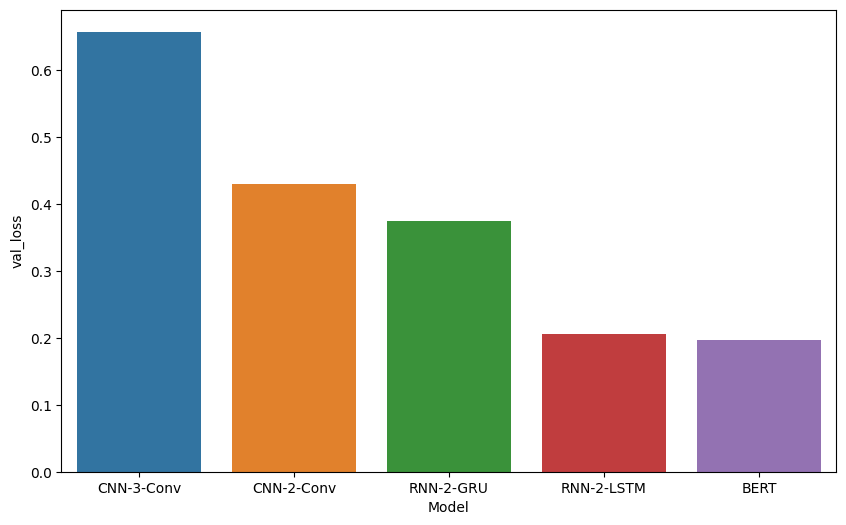

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Model', y= 'val_loss',data=df_results)

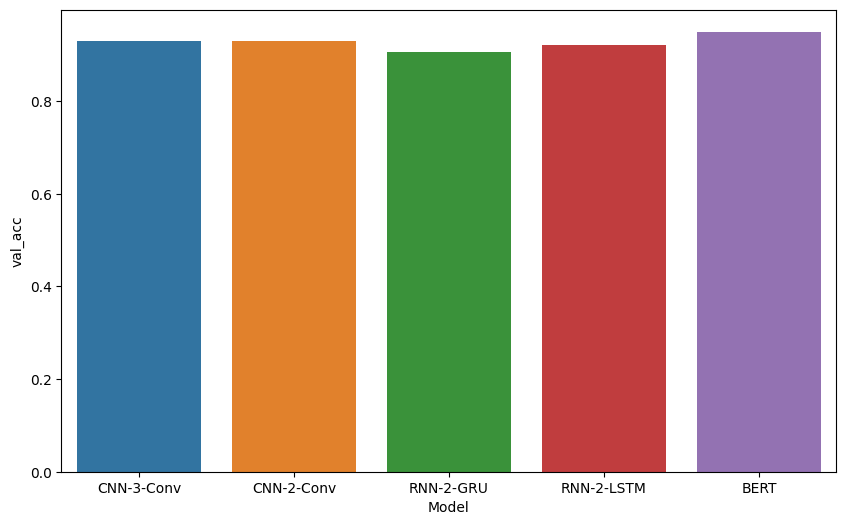

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Model', y= 'val_acc',data=df_results)